In [1]:
import numpy as np
import pandas as pd

# <span style="color: red;"> 1. Introducing Pandas Object</span>

## Series là mảng 1 chiều có chỉ mục 

In [2]:
data  = pd.Series([0.25, 0.5, 0.75, 1.0])

In [3]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

### Giống với np array, dữ liệu có thể dc truy cập bởi index

In [5]:
data[1]


0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Về cơ bản đối tượng series giống vs mảng một chiều np 
Khác nhau ở chỗ Series có chỉ mục rõ ràng liên kết với giá trị còn numpy array cho chỉ mục được xác định ngầm điều này giúp Series có khả năng bổ sung. 
Vd: chỉ mục k cần là số nguyên mà có thể là chuỗi, không cần liền kề và k tuần tự

In [7]:
data = pd.Series([1,2,3,4], index = ['a', 'b', 'c','d'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
data['b']

2

### Có thể xem Series giống như một dictionary {} đặc biệt

In [9]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

## DataFrame là một mảng numpy tổng quát là mảng hai chiều với chỉ mục và tên cột linh hoạt. 
Có thể xem DF là một loạt các Series có cùng chỉ mục 

In [10]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [11]:
states  = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### Xây dựng df từ một đối tượng Series duy nhất
Một df là một tập hợp series các đối tượng và một cột df có thể tạo từ một series

In [12]:
pd.DataFrame(population, columns = ['populations'])

,populations
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


### Xây dựng df từ một danh sách dictionary

In [13]:
data  = [{'a': i , 'b': 2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


nếu key trong dict mà missing thì trả về giá trị NaN

In [14]:
pd.DataFrame([{'a': 1, 'b':2},{'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


### Xây dựng df từ một dict các đối tượng Series


In [15]:
pd.DataFrame({'population':population, 'area':area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### Xây dựng df từ mảng numpy hai chiều

In [16]:
pd.DataFrame(np.random.rand(3,2), columns = ['foo', 'bar'], index = ['a', 'b','c'])

,foo,bar
a,0.194106,0.969133
b,0.940082,0.369310
c,0.196936,0.922203


### Xây dựng df từ một mảng numpy có cấu trúc

In [17]:
A = np.zeros(3, dtype= [('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [18]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


##  Pandas Index Object

### Index là một mảng immutable như một set có thứ tự 

In [19]:
ind = pd.Index([2,3,4,5,11])
ind

Int64Index([2, 3, 4, 5, 11], dtype='int64')

### Có thể sử dụng union, intersections, difference và các phép toán khác như set

# <span style="color: red;"> 2. Data Indexing and Selection</span>

## Data Selection in Series

### Series as dictionary


In [20]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [21]:
data['b']

0.5

In [22]:
'a' in data

True

In [23]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [24]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [25]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as one-dimensional array


In [26]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [27]:
#slicing by implicit integer index
data[0:3]

a    0.25
b    0.50
c    0.75
dtype: float64

In [28]:
#masking
data[(data > 0.3)&(data< 0.8)]

b    0.50
c    0.75
dtype: float64

### Indexers: loc, iloc, and ix
Những quy ước về slicing và indexing có thể gây nhầm lẫn. Ví dụ, nếu Series của bạn có explicit index là số nguyên, khi bạn thao tác với chỉ mục như data[1] sẽ sử dụng explicit index đó, trong khi thao tác slicing data[1:3] sẽ sử dụng implicit index của Python 

In [29]:
data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [30]:
#explicit index when indexing
data[1]

'a'

In [31]:
#implicit index when indexing
data[1:3]

3    b
5    c
dtype: object

Vì sự dễ gây nhầm lẫn này Pandas đã cung cấp vài thuộc tính indexer dể hiển thị rõ ràng các lược đồ indexing nhất định.

In [32]:
# loc cho phép indexing và slicing luôn luôn tham chiếu đến explicit index
data.loc[1]

'a'

In [33]:
data.loc[1:3]

1    a
3    b
dtype: object

In [34]:
# iloc cho pheo indexing và slicing luôn luôn tham chiếu đến implicit index
data.iloc[1]

'b'

In [35]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [36]:
# ix is hybrid of the two 

## Data Selection in DataFrame

### DataFrame as a dictionary

In [37]:
area = pd.Series({'California' : 423967, 'Texas': 695662, 
                  'New York': 141297, 'Florida': 170312, 
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193, 
                 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop': pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [38]:
# Các Series riêng biệt tạo nên các cột của DF có thể được truy cập thông qua dictionary-style indexing
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [39]:
#Với tên cột dạng chuỗi ta có thể sử dụng quyền truy cập kiểu thuộc tính
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [40]:
# Quyền truy cập cột kiểu thuộc tính này thực sự truy cập vào cùng một đối tượng như quyền truy cập kiểu dictionary
data.area is data['area']

True

Mặc dù đây là cách viết hữu ích nhưng hãy nhớ rằng nó không áp dụng được cho mọi trường hợp 
Ví dụ: nếu tên cột không phải là chuỗi hoặc nếu tên cột xxung đột với các phương thức của DF thì không thể truy cập kiểu thuộc tính này 

In [41]:
# DF có phương thức pop(), do đó data.pop sẽ trỏ đến đây thay vì cột "pop"
data.pop is data['pop']

False

Đặc biệt, bạn nên tránh gán cột thông qua thuộc tính 
Ví dụ: sử dụng data['pop'] = z thay vì data.pop = z

In [42]:
# Giống với Series đã thảo luận trước đó, dictionary-style syntax có thể sử dụng để thay đổi đối tượng
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


## DataFrame as two-dimensional array 

In [43]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [44]:
# Transpose full DataFrame: swap rows and columns
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Tuy nhiên, khi nói đến indexing đối tượng DF, rõ ràng việc indexing các cột theo dictionary-style ngăn cản khả năng của chúng ta trong việc coi nó như một mảng numpy.


In [45]:
# passing a single index to an array accesses a row:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [46]:
# passing a single "index" to a DF accesses a column:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Để indexing array-style chúng ta cần một quy ước khác.
Ở đây Pandas sử dụng loc, iloc, ix indexes đã đc đề cập trước đó
Sử dụng iloc, chúng ta có thể indexing cho mảng như thể nó là một mảng Numpy đơn giản ( sử dụng implicit index, nhung đối với DF kết quả là index và label cột vẫn được duy trì:

In [47]:
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [48]:
data.loc[:'New York', : 'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [49]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [50]:
# modify values 
data.iloc[0,2] = 90 

In [51]:
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Additional indexing conventions


In [52]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [53]:
data[3:5]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [54]:
data[data.density >100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


#  <span style="color: red;">3. Operating on Data in Pandas </span>

## Ufuncs: Index Preservation

In [55]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [56]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


Nếu chúng ta sử dụng Numpy ufunc lên các đối tượng này kết quả trả về sẽ là đối tượng Pandas khác giữ nguyên chỉ mục

In [57]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [58]:
np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### Index alignment in series

In [59]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [60]:
population /area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [61]:
#Kết quả gồm phép union chỉ mục của 2 mảng đầu vào
area.index | population.index

<ipython-input-61-3affe87cc2f6>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [62]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B


0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Bất kỳ mục nào mà mục này hoặc mục kia không có mục nhập đều được đánh dấu bằng NaN

Nếu việc sử dụng giá trị NaN không phải là hành vi mong muốn thì giá trị điền có thể được sửa đổi bằng cách sử dụng các phương thức đối tượng thích hợp thay cho các toán tử. Ví dụ: việc gọi A.add(B) tương đương với việc gọi A + B, nhưng cho phép đặc tả rõ ràng tùy chọn về giá trị điền cho bất kỳ phần tử nào trong A hoặc B có thể bị thiếu:

In [63]:
 # Nếu một trong hai DataFrame không có giá trị tại một vị trí cụ thể, giá trị mặc định (ở đây là 0) sẽ được sử dụng cho phép cộng.
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

In [64]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [65]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [66]:
A  +  B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Như trường hợp của Series, chúng ta có thể sử dụng phương thức số học của đối tượng liên quan và chuyển bất kỳ mục nào mong muốn, fill_value sẽ được sử dụng thay cho các mục bị thiếu. Ở đây chúng ta sẽ điền giá trị trung bình của tất cả các giá trị trong A:

In [67]:
# Chuyển đổi DataFrame từ dạng rộng sang dạng dài bằng cách sử dụng stack(). 
fill = A.stack().mean()
A.add(B, fill_value = fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


## Ufuncs: Operations Between DataFrame and Series

In [68]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [69]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [70]:
df = pd.DataFrame(A, columns = list('QRST'))
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [71]:
df-df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [72]:
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [73]:
halfrow = df.iloc[0, ::2]
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [74]:
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [75]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# <span style="color: red;"> 4. Handling Missing Data </span>

## Trade-Offs in Missing Data Conventions 
(Thỏa hiệp trong các quy ước về dữ liệu bị thiếu)

Có hai phương pháp chính để biểu thị dữ liệu bị thiếu trong bảng hoặc DataFrame:
- Sử dụng mask: Mask là một mảng Boolean riêng biệt hoặc DF cùng kích thước mà mỗi phần tử cho biết liệu phần tử tương ứng trong DF gốc có bị thiếu hay không. 
- Sử dụng sentinel value ( giá trị đặc biệt): Giá trị đặc biệt là các giá trị cụ thể được chọn để biểu thị dữ liệu thiếu. Các giá tị này thường được chọn sao cho ít khả năng xuất hiện tự nhiên trong tập dữ liệu. Các giá trị đặc biệt thông dụng bao gồm 'NaN' cho kiểu dữ liệu float, 'None' cho kiểu object, hoặc các giá trị đặc biệt như -9999 cho int.


Trade-offs: 
- Đối vs việc sử dụng mask: 
 + Cần thêm bộ nhớ để lưu trữ mask array.
 + Quản lý phức tạp hơn vì cần theo dõi cả dữ liệu đầu vào và mask.
- Đối vơi việc sử dụng sentinel value: 
 + Giá trị đặc biệt có thể xung đột với các giá trị dữ liệu hợp lệ.
 + Cần các giá trị đặc biệt khác nhau cho các loại dữ liệu khác nhau (ví dụ: np.nan cho float, -9999 cho integer).
 + Có thể làm phức tạp các thao tác dữ liệu nếu không xử lý đúng cách (ví dụ: tổng hợp dữ liệu có thể bị ảnh hưởng bởi các giá trị đặc biệt).

## Missing Data in Pandas

### None: Pythonic missing data
Sentinel value đầu tiền được dùng bởi Pandas là None, một đối tượng Python thường sử dụng cho dữ liệu bị mất trong Python code
Bởi vì None là một object nên None không thể sử dụng trong bất kỳ mảng Numpy/Pandas tùy ý mà chỉ trong các mảng có kiểu dữ liệu 'object' (tức là mảng các đối tượng python)

In [76]:
vals1 = np.array([1, None, 3, 4])
vals1 

array([1, None, 3, 4], dtype=object)

dtype = object là kiểu biểu diễn phổ biến nhất mà NumPy có thể suy ra cho các phần tử trong mạng là các đối tượng Python
Điều này có một số hệ quả và sự thỏa hiệp,  tuy loại mảnh đối tượng này hữu ích cho một số mục đích nhưng chi phí sẽ nhiều hơn so với thao tác nhanh chóng thường thấy đối với các mảng có kiểu dữ liệu gốc:

In [78]:
for dtype in ['object','int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype = dtype).sum()
    print()

dtype =  object
51 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype =  int
1.49 ms ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



Khi sử dụng mảng object cũng có nghĩa là nếu thực hiện các phép kết hợp như sum(), min() qua mảng với giá trị None sẽ xảy ra lỗi

In [80]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

### NaN: Missing numerical data

NaN: là một giá trị số thực đặc biệt được công nhận bởi tất cả các hệ thống sử dụng số thực tiêu chuẩn IEEE 

In [81]:
vals2 = np.array([1, np.nan, 3, 4])

In [82]:
vals2.dtype

dtype('float64')

In [83]:
# Bất kể thao tác nào kết hợp với NaN cũng cho ra kết quả là một NaN khac
1+ np.nan

nan

In [84]:
0*np.nan

nan

In [85]:
vals2.sum()

nan

In [86]:
#Numpy cung cấp một số hàm tổng hợp bỏ qua các giá trị missing 
np.nansum(vals2)

8.0

In [87]:
np.nanmin(vals2)

1.0

In [88]:
np.nanmax(vals2)

4.0

### NaN and None in Pandas

NaN và None trong Pandas được xây dựng để chuyển đổi giữa chúng khi thích hợp:


In [90]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Đối với các loại không có sẵn giá trị trọng điểm, Pandas sẽ tự động nhập kiểu khi có giá trị NA
Ví dụ: Nếu chúng ta đặt một giá trị trong một mảng số nguyên thành np.nan, nó sẽ tự động được cập nhật thành loại dấu phẩy động để phù hợp với NA:

In [94]:
x = pd.Series(range(2), dtype =int)
x

0    0
1    1
dtype: int32

In [95]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Note: Ngoài việc chuyển mảng số nguyên thành float Pandas còn tự động chuyển đổi None thành NaN. Điều này giúp Pandas xử lý các giá trị thiếu một cách nhất quán
Bảng sau liệt kê các quy ước upcasting trong Pandas khi các giá trị NA được giới thiệu :
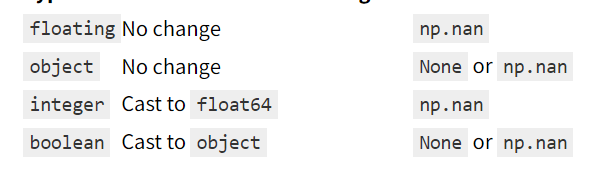
Dữ liệu dạng chuỗi (string) luôn luôn được lưu trữ dtype = object
      

## Operating on Null Values
- isnull(): Tạo một boolean mask chỉ đến missing value
- notnull(): ngược lại với isnull()
- dropna(): Trả về một phiên bản đã được lọc của dữ liệu
- fillna(): Trả về một bản sao của dữ liệu với missing value đã được điền hoặc được gán.

### Detecting null values

In [98]:
data =pd.Series([1, np.nan, 'hello',None])

In [99]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [100]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [101]:
#boolean masks can ben used directly as a Series or DF index
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping null values

In [102]:
data.dropna()

0        1
2    hello
dtype: object

In [103]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Không thể xóa 1 giá trị duy nhất từ DF chỉ có thể xóa cả hàng hoặc cột chứa missing value 

In [104]:
# drop tất cả các dòng  có bất kì giá trị null được biểu biển
df.dropna()

,0,1,2
1,2.0,3.0,5


In [106]:
# drop tất cả các cột chứa null value
df.dropna(axis = 1)

,2
0,2
1,5
2,6


In [107]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [109]:
# Xóa cột nào có tất cả giá trị là null
df.dropna(axis = 1,  how ='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [116]:
# Để kiểm soát chi tiết hơn,tham số "thresh" cho phép bạn  chỉ định số lượng giá trị KHÁC null tối thiểu cho hàng/cột được giữ lại
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [117]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [119]:
# fill cac gia tri null thanh gia tri 0
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [120]:
# foward-fill (fill bằng các giá trị ở dòng trước đó)
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [121]:
# back-fill (fill bằng các giá trị ở dòng sau đó)
data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [123]:
# Tương tự đối với DF, tuy nhiên phải chỉ định một axis cụ thể
df.fillna(method = 'ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Nếu giá trị trước không có sẵn trong ffill thì NA value được giữ nguyên

In [125]:
df.fillna(method='bfill', axis =1)

,0,1,2,3
0,1.0,2.0,2.0,NaN
1,2.0,3.0,5.0,NaN
2,4.0,4.0,6.0,NaN


In [126]:
df.fillna(method ='ffill', axis =0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [128]:
df.fillna(method = 'bfill', axis =0)

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN
